Follow link for Project Repository

https://github.com/anajikadam17/IoT-Project_BE_project

## BE Final year project Live data Web Scripting 

In [79]:
# Import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re 


In [ ]:
# url = 'http://www.anajiproject.tk/project3/data1.php'  # This URl is not working Now
url = 'https://anajiprojects.000webhostapp.com/project3/data1.php'   # Working URL
html = urlopen(url)
soup = BeautifulSoup(html)

In [80]:
# Find out Title of webpage  
title = soup.title
print(title)
print(title.text)

<title>Projects | Anaji_project</title>
Projects | Anaji_project


In [81]:
# Find Out length of Data
data = []
allrows = soup.find_all('tr')

for row in allrows:
    row_list = row.find_all('td')
    dataRow =[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
len(data)
# print(data)

630

In [82]:
# Find out number of columns and columns names
header_list = []
header = soup.find_all('th')
for col in header:
    header_list.append(col.text)
print(len(header_list))
print(header_list)

11
['Date & Time', 'Temperature', 'Action', 'Humidity', 'Ammonia Gas Level', 'Action', 'Light', 'Action', 'Water Level', 'Action', 'Cleaning']


In [83]:
# Create dataframe for extracted data and also sinf shape of dataframe
df1 = pd.DataFrame(data)
print(df1.head())
print(df1.shape)

                    0     1       2     3     4          5     6         7   \
0                 None  None    None  None  None       None  None      None   
1  26/04/2019 03:40 PM    31  FanOff    49   188  ExhFanOFF   114  LightOFF   
2  26/04/2019 03:39 PM    31  FanOff    50   182  ExhFanOFF   158  LightOFF   
3  26/04/2019 03:39 PM    31  FanOff    50   183  ExhFanOFF   137  LightOFF   
4  26/04/2019 03:38 PM    31  FanOff    50   189  ExhFanOFF   165  LightOFF   

     8        9           10  
0  None     None        None  
1    75  PumpOff  ProcessOFF  
2    75  PumpOff  ProcessOFF  
3    75  PumpOff  ProcessOFF  
4    75  PumpOff  ProcessOFF  
(630, 11)


In [96]:
header_list = []
col_header = soup.find_all('th')
for col in col_header:
    header_list.append(col.text)
#print(header_list)
df1.columns = header_list
df = df1[1:]
df.head()

,Date & Time,Temperature,Action,Humidity,Ammonia Gas Level,Action,Light,Action,Water Level,Action,Cleaning
1,26/04/2019 03:40 PM,31,FanOff,49,188,ExhFanOFF,114,LightOFF,75,PumpOff,ProcessOFF
2,26/04/2019 03:39 PM,31,FanOff,50,182,ExhFanOFF,158,LightOFF,75,PumpOff,ProcessOFF
3,26/04/2019 03:39 PM,31,FanOff,50,183,ExhFanOFF,137,LightOFF,75,PumpOff,ProcessOFF
4,26/04/2019 03:38 PM,31,FanOff,50,189,ExhFanOFF,165,LightOFF,75,PumpOff,ProcessOFF
5,26/04/2019 03:38 PM,31,FanOff,50,190,ExhFanOFF,117,LightOFF,45,PumpOff,ProcessOFF


In [97]:
# find all columns
df.columns

Index(['Date & Time', 'Temperature', 'Action', 'Humidity', 'Ammonia Gas Level',
       'Action', 'Light', 'Action', 'Water Level', 'Action', 'Cleaning'],
      dtype='object')

In [98]:
# Rename Columns name in proper format
df.columns = ['Date_Time', 'Temperature', 'Action1', 'Humidity', 'Ammonia_Gas_Level','Action2', 'Light', 'Action3', 'Water_Level', 'Action4', 'Cleaning']

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 1 to 629
Data columns (total 11 columns):
Date_Time            629 non-null object
Temperature          629 non-null object
Action1              629 non-null object
Humidity             629 non-null object
Ammonia_Gas_Level    629 non-null object
Action2              629 non-null object
Light                629 non-null object
Action3              629 non-null object
Water_Level          629 non-null object
Action4              629 non-null object
Cleaning             629 non-null object
dtypes: object(11)
memory usage: 54.1+ KB


In [100]:
# save data file as csv
df.to_csv('data1.csv')

In [101]:
df.head()

,Date_Time,Temperature,Action1,Humidity,Ammonia_Gas_Level,Action2,Light,Action3,Water_Level,Action4,Cleaning
1,26/04/2019 03:40 PM,31,FanOff,49,188,ExhFanOFF,114,LightOFF,75,PumpOff,ProcessOFF
2,26/04/2019 03:39 PM,31,FanOff,50,182,ExhFanOFF,158,LightOFF,75,PumpOff,ProcessOFF
3,26/04/2019 03:39 PM,31,FanOff,50,183,ExhFanOFF,137,LightOFF,75,PumpOff,ProcessOFF
4,26/04/2019 03:38 PM,31,FanOff,50,189,ExhFanOFF,165,LightOFF,75,PumpOff,ProcessOFF
5,26/04/2019 03:38 PM,31,FanOff,50,190,ExhFanOFF,117,LightOFF,45,PumpOff,ProcessOFF


In [114]:
# apply some as pd.to_numeric function
# dataframe of numeric content
df[['Temperature','Humidity', 'Ammonia_Gas_Level','Light', 'Water_Level']] = df[['Temperature','Humidity', 'Ammonia_Gas_Level','Light', 'Water_Level']].apply(pd.to_numeric)
data = df[['Date_Time', 'Temperature','Humidity', 'Ammonia_Gas_Level','Light', 'Water_Level']]
# data = df['Date_Time']
data.head()


,Date_Time,Temperature,Humidity,Ammonia_Gas_Level,Light,Water_Level
1,26/04/2019 03:40 PM,31,49,188,114,75
2,26/04/2019 03:39 PM,31,50,182,158,75
3,26/04/2019 03:39 PM,31,50,183,137,75
4,26/04/2019 03:38 PM,31,50,189,165,75
5,26/04/2019 03:38 PM,31,50,190,117,45


In [115]:
# Check data types
df = df.infer_objects() 
print(df.dtypes)

Date_Time            object
Temperature           int64
Action1              object
Humidity              int64
Ammonia_Gas_Level     int64
Action2              object
Light                 int64
Action3              object
Water_Level           int64
Action4              object
Cleaning             object
dtype: object


In [116]:
# Chategorical dataframe
data1 = df[['Date_Time','Action1','Action2','Action3','Action4', 'Cleaning']]
data1.head()

,Date_Time,Action1,Action2,Action3,Action4,Cleaning
1,26/04/2019 03:40 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF
2,26/04/2019 03:39 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF
3,26/04/2019 03:39 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF
4,26/04/2019 03:38 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF
5,26/04/2019 03:38 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF


In [118]:
# Find out number of days record
max_date_date = pd.to_datetime(df['Date_Time'].max()).date()
min_date_date = pd.to_datetime(df['Date_Time'].min()).date()
lag_size = (max_date_date - min_date_date).days
print('Maximum date from dataset: {}'.format(max_date_date))
print('Minimum date from dataset: {}'.format(min_date_date))
print('Forecast Lag: {}'.format(lag_size))

Maximum date from dataset: 2019-04-26
Minimum date from dataset: 2019-01-04
Forecast Lag: 112


In [122]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return numeric_col

numeric_columns = numeric_features(data)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return categorical_col

categorical_columns = categorical_features(data1)
print("Categorical Features:")
print(categorical_columns)

Numeric Features:
['Temperature', 'Humidity', 'Ammonia_Gas_Level', 'Light', 'Water_Level']
Categorical Features:
['Date_Time', 'Action1', 'Action2', 'Action3', 'Action4', 'Cleaning']


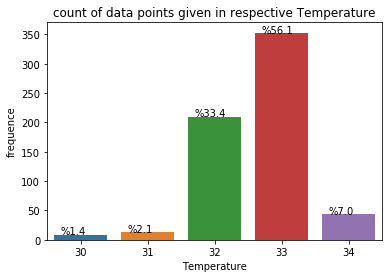

In [57]:
# Percentage plot for Temperature 
ax = sns.countplot(x = 'Temperature', data = data)
plt.title('count of data points given in respective Temperature')
plt.xlabel('Temperature')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))
plt.show()

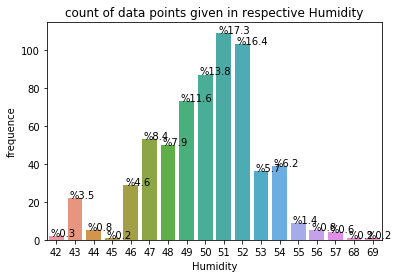

In [155]:
# Percentage plot for Humidity 
ax = sns.countplot(x = 'Humidity', data = data)
plt.title('count of data points given in respective Humidity')
plt.xlabel('Humidity')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))
plt.show()

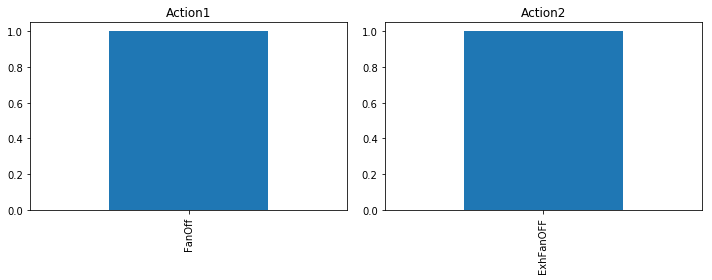

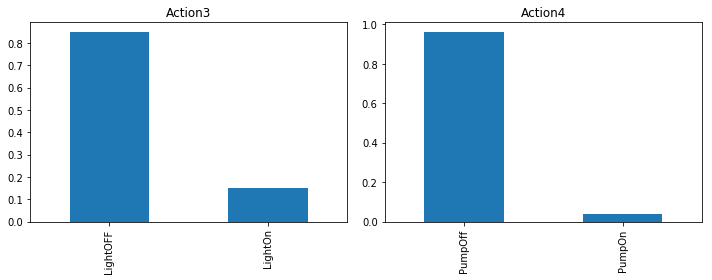

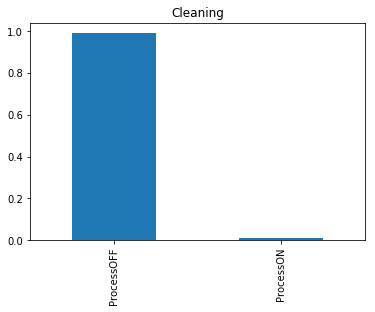

In [128]:
# Function to perform univariate analysis of categorical columns
data2 = data1.iloc[:,1:]
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])


                
plot = plot_categorical_columns(data2)

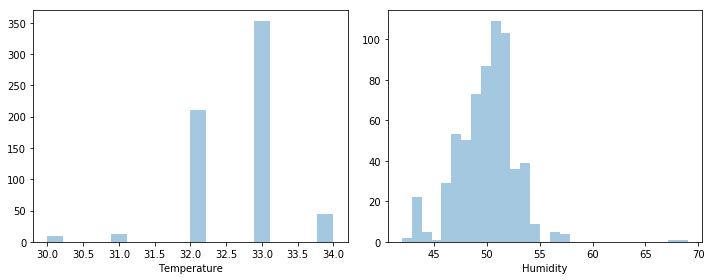

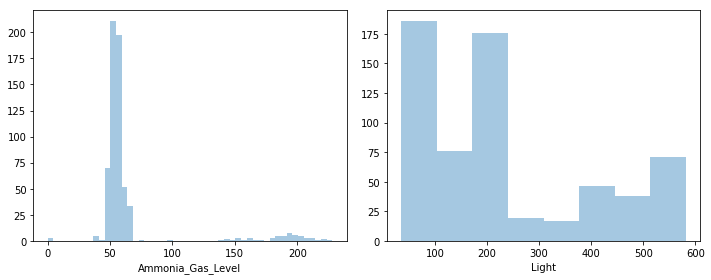

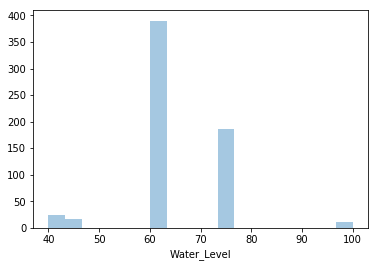

In [126]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

plot_continuous_columns(data)

In [134]:
data1.head()   # categorical Dataframe

,Date_Time,Action1,Action2,Action3,Action4,Cleaning
1,26/04/2019 03:40 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF
2,26/04/2019 03:39 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF
3,26/04/2019 03:39 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF
4,26/04/2019 03:38 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF
5,26/04/2019 03:38 PM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessOFF


In [130]:
data1['Action1'].nunique()   # Unique value in Action1 column

1

In [133]:
data1['Action1'].value_counts()   # value counts for Action1

FanOff    629
Name: Action1, dtype: int64

In [132]:
data1['Action2'].value_counts()   # value counts for Action2

ExhFanOFF    629
Name: Action2, dtype: int64

In [136]:
data1['Action3'].value_counts()    # value counts for Action3

LightOFF    534
LightOn      95
Name: Action3, dtype: int64

In [137]:
data1['Action4'].value_counts()     # value counts for Action4

PumpOff    605
PumpOn      24
Name: Action4, dtype: int64

In [138]:
data1['Cleaning'].value_counts()      # value counts for Cleaning

ProcessOFF    623
ProcessON       6
Name: Cleaning, dtype: int64

In [140]:
data1[data1['Cleaning']=='ProcessON']    # find data for Cleaning processON

,Date_Time,Action1,Action2,Action3,Action4,Cleaning
479,02/04/2019 07:03 AM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessON
521,02/04/2019 06:17 AM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessON
522,02/04/2019 06:11 AM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessON
523,02/04/2019 06:09 AM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessON
524,02/04/2019 06:06 AM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessON
525,02/04/2019 06:04 AM,FanOff,ExhFanOFF,LightOFF,PumpOff,ProcessON


In [141]:
data.head()    # Dataframe for Numerical values

,Date_Time,Temperature,Humidity,Ammonia_Gas_Level,Light,Water_Level
1,26/04/2019 03:40 PM,31,49,188,114,75
2,26/04/2019 03:39 PM,31,50,182,158,75
3,26/04/2019 03:39 PM,31,50,183,137,75
4,26/04/2019 03:38 PM,31,50,189,165,75
5,26/04/2019 03:38 PM,31,50,190,117,45


In [149]:
# Max and Min sensors value for Temperature column
print('For Temperature Column: ')
print('Max Value',data['Temperature'].max())
print('Min Value',data['Temperature'].min())

For Temperature Column: 
Max Value 34
Min Value 30


In [150]:
# Max and Min sensors value for Humidity column
print('For Humidity Column: ')
print('Max Value',data['Humidity'].max())
print('Min Value',data['Humidity'].min())

For Humidity Column: 
Max Value 69
Min Value 42


In [151]:
# Max and Min sensors value for Ammonia_Gas_Level column
print('For Ammonia_Gas_Level Column: ')
print('Max Value',data['Ammonia_Gas_Level'].max())
print('Min Value',data['Ammonia_Gas_Level'].min())

For Ammonia_Gas_Level Column: 
Max Value 228
Min Value 0


In [152]:
# Max and Min sensors value for Light column
print('For Light Column: ')
print('Max Value',data['Light'].max())
print('Min Value',data['Light'].min())

For Light Column: 
Max Value 582
Min Value 35


In [154]:
# Threshold for water level given for water tank
data['Water_Level'].unique()

array([ 75,  45,  40,  60, 100], dtype=int64)

### These is practice on test data, all the records collected automatically and sensored data recorded
### Real database is not access now So I have done Practice on test database
### Also I planned many more outputs from that real data but that is not possible now.
## for example... 
### 1>. water pumps get ON for some time calcutate energy required for these operation multiple of number of times operation done then get total energy consume for certain operation same for light and cleaning precess in that electric moter and light bulb are used and electricity as energy.
### 2>. Temperature and Humidity maintained by doing that automatic processes then what is the production growth for poultry farm, calculate difference in between before automation and after automation.

